In [ ]:
# download modsim.py if necessary

from os.path import basename, exists

def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve
        local, _ = urlretrieve(url, filename)
        print('Downloaded ' + local)

download('https://raw.githubusercontent.com/AllenDowney/' +
         'ModSimPy/master/modsim.py')

In [ ]:
# import functions from modsim

from modsim import *

In [ ]:
download('https://github.com/AllenDowney/ModSimPy/raw/master/' +
         'chap11.py')

In [ ]:
download('https://github.com/AllenDowney/ModSimPy/raw/master/' +
         'chap12.py')

In [ ]:
download('https://github.com/AllenDowney/ModSimPy/raw/master/' +
         'chap13.py')

In [ ]:
# import code from previous notebooks

from chap11 import make_system
from chap11 import update_func
from chap11 import run_simulation
from chap11 import plot_results

from chap12 import calc_total_infected

from chap13 import sweep_beta
from chap13 import sweep_parameters

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def sweep_beta_max(beta_array, gamma):
    sweep = SweepSeries()
    for beta in beta_array:
        system = make_system(beta, gamma)
        results = run_simulation(system, update_func)
        sweep[beta] = results.i.max()
    return sweep

In [ ]:
def sweep_parameters_max(beta_array, gamma_array):
    frame = SweepFrame(columns=gamma_array)
    for gamma in gamma_array:
        frame[gamma] = sweep_beta_max(beta_array, gamma)
    return frame

In [ ]:
def analyze_covid_results(frame):
    for gamma in frame.columns:
        series = frame[gamma]
        for beta in series.index:
            metric = series[beta]
            plt.plot(beta/gamma, metric, '.', color='C1')

    decorate(xlabel='Contact number (beta/gamma)',
             ylabel='Max fraction infected')

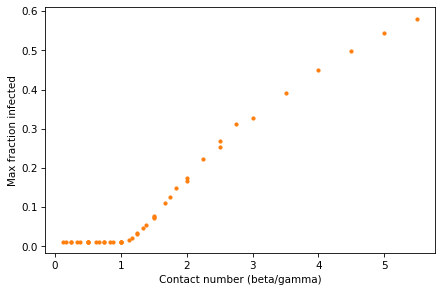

In [ ]:
beta_array = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1]
gamma_array = [0.2, 0.4, 0.6, 0.8]

# Run the simulation
covid_frame = sweep_parameters_max(beta_array, gamma_array)

analyze_covid_results(covid_frame)
plt.show()

